In [107]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import json

In [108]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Lectura de datos

In [109]:
# path a los archivos de datos
path_pozos = "datos/capitulo-iv-pozos.csv"
path_produccion_2024 = "datos/produccin-de-pozos-de-gas-y-petrleo-2024.csv"
path_no_convencionales = "datos/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"

In [110]:
# lectura de datos
pozos = pd.read_csv(path_pozos)
prod_convencional = pd.read_csv(path_produccion_2024)
prod_no_convencional = pd.read_csv(path_no_convencionales)

/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (16,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Análisis exploratorio

## Pozos

In [111]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [112]:
# transformacion de tipo fechas
col_fechas = ["adjiv_fecha_inicio_perf", "adjiv_fecha_fin_perf", "adjiv_fecha_inicio_term", "adjiv_fecha_fin_term"]
for col in col_fechas:
    pozos[col] = pd.to_datetime(pozos[col], format="%Y-%m-%d")

In [113]:
pozos.shape

(84332, 26)

In [114]:
area_to_cod_area = pozos.groupby('area')['cod_area'].nunique()
area_one_to_one = (area_to_cod_area <= 1).all()
area_one_to_one

False

In [115]:
area_cod_mayor_uno = set(area_to_cod_area[area_to_cod_area > 1].index)

In [116]:
heatmap_areas_codigos = pozos[pozos['area'].isin(area_cod_mayor_uno)][["area", "cod_area"]].pivot_table(index="area", columns="cod_area", aggfunc="size", fill_value=0)

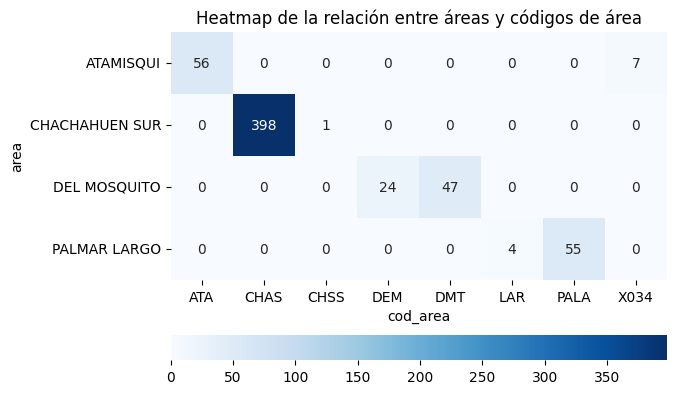

In [117]:
# plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_areas_codigos, cmap="Blues", annot=True, fmt="d", cbar=True, cbar_kws={'orientation': 'horizontal'})
plt.title("Heatmap de la relación entre áreas y códigos de área")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [118]:
pozos[(pozos["area"] == "ATAMISQUI") & (pozos["cod_area"] == "X034")]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
7950,EQ-1,39234,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1067.28,1897.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.55920000000...",0101000020E610000016FBCBEEC92351C008AC1C5A64CF...
7951,EQ-2,39235,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1072.60,1538.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53522999999...",0101000020E6100000A3755435412251C0CCD1E3F736D9...
7952,M.EQ.x-4,39236,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1181.40,2104.0,No informado,No informado,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.61368000000...",0101000020E6100000658D7A88462751C01D7233DC80CF...
7954,M.EQ.a-6,39238,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1150.93,2125.0,No informado,No informado,No informado,No informado,no,Otro tipo,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.63120999999...",0101000020E61000001FBAA0BE652851C005FA449E24CD...
7956,YPF.Md.EQ.x-8,39240,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1144.64,2244.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.58921999999...",0101000020E61000008B89CDC7B52551C04D672783A3D4...
7957,YPF.Md.EQ.x-10,39241,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1107.00,2191.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.56901000000...",0101000020E61000003546EBA86A2451C0CEC29E76F8CB...
25482,YPF.Md.LNG.x-1,77771,ATAMISQUI,X034,NaN,POZOS SIN YACIMIENTO,X003,formación improductiva,CUYANA,Mendoza,1080.43,1814.0,EXPLORACION,EXPLORACION,No informado,No informado,no,Petrolífero,Sin Sistema de Extracción,Abandonado,NaT,NaT,NaT,NaT,"{""type"":""Point"",""coordinates"":[-68.53776999999...",0101000020E610000046B1DCD26A2251C0A6ED5F5969D2...


In [119]:
def plot_mapa_pozos(pozos_df):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    pozos_gdf = gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

    argentina = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the argentina GeoDataFrame
    argentina.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot the pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=20, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

In [120]:
# Extract coordinates from the geojson column
def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return geojson['coordinates']

pozos['coordinates'] = pozos['geojson'].apply(extract_coordinates)
pozos['longitude'] = pozos['coordinates'].apply(lambda x: x[0])
pozos['latitude'] = pozos['coordinates'].apply(lambda x: x[1])

/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


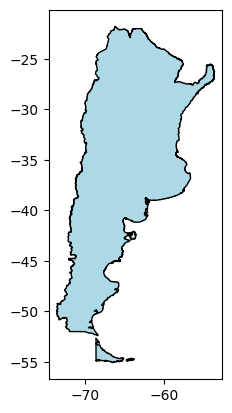

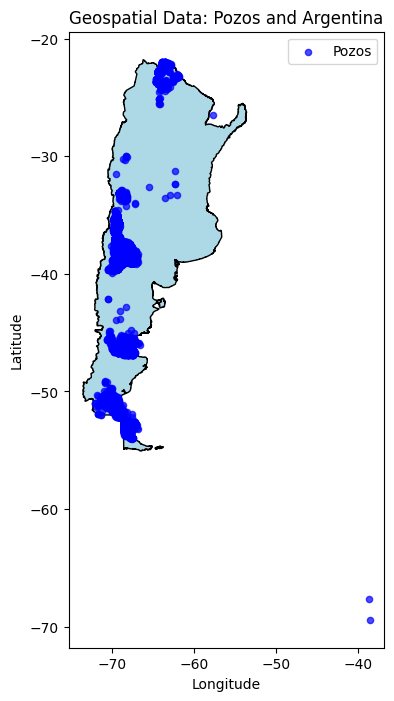

In [121]:
plot_mapa_pozos(pozos)

Hay dos pozos en el medio de la nada

In [122]:
pozos[pozos["longitude"] > -40]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geometry
4613,SJ.RN.LN-7,10143,LOMA NEGRA,LNE,CAPEX S.A.,LOMA NEGRA,LNE,lajas,NEUQUINA,Rio Negro,396.31,3329.0,EXPLOTACION,DESARROLLO,No informado,No informado,no,Petrolífero,Electrosumergible,Extracción Efectiva,1998-10-19,1998-11-09,1999-02-09,1999-02-20,"{""type"":""Point"",""coordinates"":[-38.756338,-67....",0101000020E61000006C5CFFAECF6043C0682096CD1CE9...,"[-38.756338, -67.642383]",-38.756338,-67.642383,POINT (-38.75634 -67.64238)
80786,PBE.Nq.M-1063(d),162058,EL MANGRULLO,GRU,PAMPA ENERGIA S.A.,EL MANGRULLO,MGR,agrio,NEUQUINA,Neuquén,649.10,1525.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,TIGHT,no,Gasífero,Surgencia Natural,Extracción Efectiva,2019-06-22,2019-07-03,2020-12-17,2021-01-06,"{""type"":""Point"",""coordinates"":[-38.59006999999...",0101000020E6100000E42CEC69874B43C01B2AC6F99B5A...,"[-38.59007, -69.41577]",-38.590070,-69.415770,POINT (-38.59007 -69.41577)


Parece que latitud y longitud están intercambiados

In [123]:
# swap long and lat of idpozo 10143 and 162058
pozos.loc[pozos["idpozo"] == 10143, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 10143, ["longitude", "latitude"]].values
pozos.loc[pozos["idpozo"] == 162058, ["latitude", "longitude"]] = pozos.loc[pozos["idpozo"] == 162058, ["longitude", "latitude"]].values

In [124]:
pozos.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geometry
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,255.00,1702.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...,"[-68.287853, -45.591133]",-68.287853,-45.591133,POINT (-68.28785 -45.59113)
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,251.00,1350.0,EXPLORACION,EXPLORACION,CONVENCIONAL,No informado,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...,"[-68.292019, -45.592025]",-68.292019,-45.592025,POINT (-68.29202 -45.59202)
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.15,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...,"[-68.283878, -45.590244]",-68.283878,-45.590244,POINT (-68.28388 -45.59024)
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.70,1351.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...,"[-68.289483, -45.594069]",-68.289483,-45.594069,POINT (-68.28948 -45.59407)
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,256.00,1350.0,EXPLOTACION,DESARROLLO,CONVENCIONAL,No informado,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...,"[-68.294475, -45.59445]",-68.294475,-45.594450,POINT (-68.29448 -45.59445)


/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


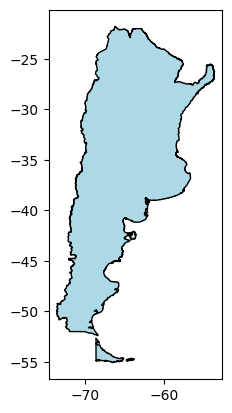

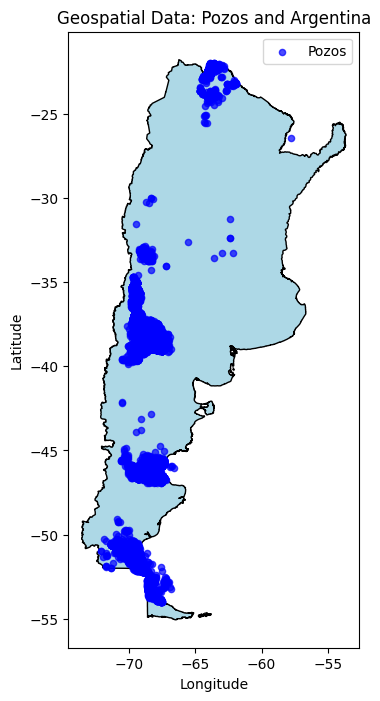

In [125]:
plot_mapa_pozos(pozos)

In [126]:
pozos["provincia"].value_counts()

Santa Cruz          23615
Chubut              22306
Neuquén             18682
Mendoza              8853
Rio Negro            5749
La Pampa             2724
Tierra del Fuego     1242
Salta                 965
Estado Nacional        73
Formosa                65
Jujuy                  46
San Juan                6
Córdoba                 6
Name: provincia, dtype: int64

In [127]:
def to_gdf(pozos_df, nombre_longitud = 'longitude', nombre_latitud = 'latitude'):
    geometry = [Point(xy) for xy in zip(pozos_df['longitude'], pozos_df['latitude'])]
    return gpd.GeoDataFrame(pozos_df, geometry=geometry, crs="EPSG:4326")

def plot_mapa_clipped(pozos_df, bounding_box):
    # Convert to GeoDataFrame
    pozos_gdf = to_gdf(pozos_df)

    argentina = geojson_data = gpd.read_file("datos/argentina.geojson")
    argentina.plot(ax=plt.gca(), color='lightblue', edgecolor='black')

    fig, ax = plt.subplots(figsize=(10, 8))
    bounding_box_gdf = gpd.GeoDataFrame({'geometry': [bounding_box]}, crs="EPSG:4326")

    # Clip Argentina GeoDataFrame to the bounding box
    argentina_clipped = gpd.clip(argentina, bounding_box_gdf)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot clipped Argentina GeoDataFrame
    argentina_clipped.plot(ax=ax, color='lightblue', edgecolor='black', label="Argentina")

    # Plot filtered pozos GeoDataFrame
    pozos_gdf.plot(ax=ax, color='blue', marker='o', markersize=10, label="Pozos", alpha=0.7)

    # Customize the plot
    plt.title("Geospatial Data: Pozos and Argentina (Clipped)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()

    # Show the plot
    plt.show()

/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


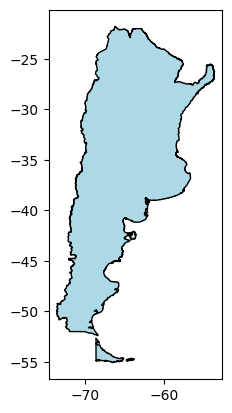

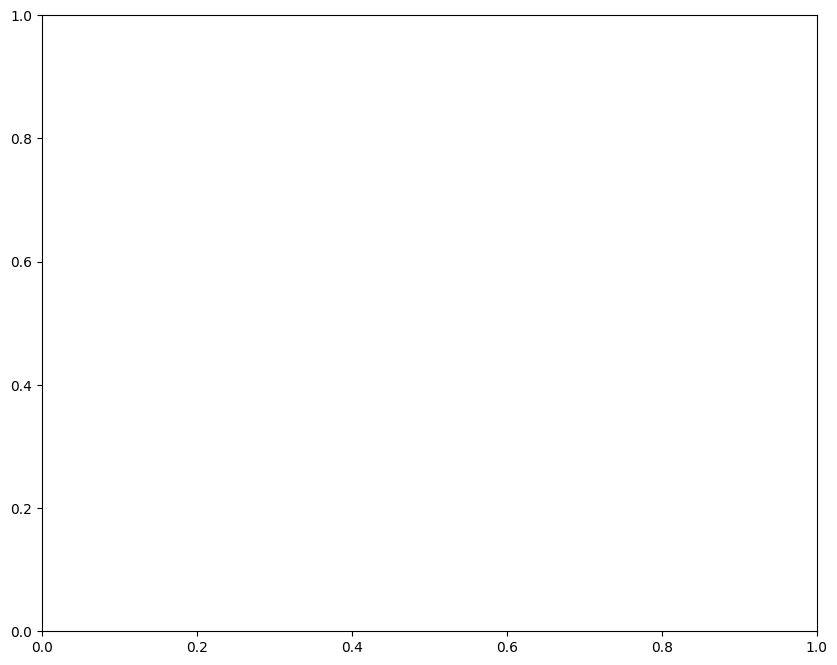

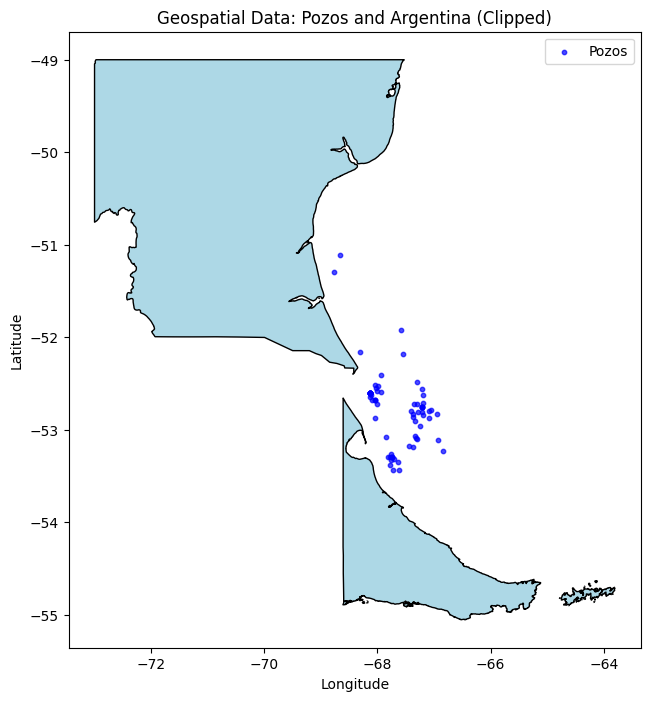

In [128]:
from shapely.geometry import box

# plot los pozos con provincia igual a "Estado Nacional"
pozos_estado_naciona = pozos[pozos["provincia"] == "Estado Nacional"]
box_to_clip = box(-73, -60, -60, -49)
plot_mapa_clipped(pozos_estado_naciona, box_to_clip)

## Produccion no convencional

In [129]:
prod_no_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.193743,-39.078336,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.224930,-38.867937,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.241585,-38.871419,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,-69.245305,-38.853815,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,-69.185218,-39.078200,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31


## Produccion 2024

In [130]:
diff_cols_2024 = set(prod_convencional.columns) - set(prod_no_convencional.columns)
diff_cols_no_conv = set(prod_no_convencional.columns) - set(prod_convencional.columns)
diff_cols_2024, diff_cols_no_conv

(set(), {'coordenadax', 'coordenaday'})

In [131]:
prod_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


# Unicidad de datos
Nos gustaria verificar que: 
- Todos los pozos que estan en el dataset principal, tambien esten en alguno de los otros dos.
- Los pozos que estan en el dataset de pozos convencionales esten en el principal.
- Los pozos que estan el el dataset de pozos no convencionales esten en el principal.
- No este el mismo pozo en el dataset convencional y no convencional a la vez.
- Las ids de cada dataset sean unicas.

In [132]:
ids_pozos = set(pozos['idpozo'])
ids_produccion_2024 = set(prod_convencional['idpozo'])
ids_no_convencionales = set(prod_no_convencional['idpozo'])

In [133]:
cnt = pozos['idpozo'].value_counts()
len(cnt[cnt > 1])

0

La tabla principal no tiene duplicados.

In [134]:
prod_convencional['idpozo'].value_counts()

32186     10
159806    10
48793     10
153270    10
132445    10
          ..
165763     1
165765     1
165755     1
165758     1
165701     1
Name: idpozo, Length: 82243, dtype: int64

Se puede observar que en la tabla de pozos convencionales la mayoria de las ids se encuentran repetidas.

In [135]:
prod_no_convencional['idpozo'].value_counts()

96689     226
11191     226
96656     226
114880    226
96659     226
         ... 
165716      1
165719      1
165718      1
165726      1
165715      1
Name: idpozo, Length: 4207, dtype: int64

Lo mismo ocurre en la de pozos no convencionales.

In [136]:
ids_en_ninguno_de_los_dos = ids_pozos - ids_produccion_2024 - ids_no_convencionales

len(ids_en_ninguno_de_los_dos)

2126

Hay cerca de 2000 que no son ni nconvencionales ni no convencionales.

In [137]:
ids_en_ambos_df = ids_produccion_2024 & ids_no_convencionales

len(ids_en_ambos_df)

4189

Vemos que hay pozos que son a la vez convencionales y no convencionales.

In [138]:
ids_prod_24_no_en_pozos = ids_produccion_2024 - ids_pozos

len(ids_prod_24_no_en_pozos)

55

Tambien hay pozos que estan en la lista de convencionales pero no en la general.

In [139]:
ids_no_conv_no_en_pozos = ids_no_convencionales - ids_pozos

len(ids_no_conv_no_en_pozos)

3

Lo mismo para los no convencionales, exploremos mas en detalle este caso que son pocos.

In [140]:
no_conv_no_en_pozos = prod_no_convencional[prod_no_convencional['idpozo'].isin(ids_no_conv_no_en_pozos)]
no_conv_no_en_pozos

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31


Veamos los pozos mas cercanos de la lista principal a los 3 que no aparecen de no convencionales

In [141]:
import math

def mas_cercano(pozo, pozos_df):
    min_dist = float('inf')
    id_mas_cerc = None
    for row in pozos_df.itertuples():
        dist = math.sqrt(((pozo['coordenadax'] - row.longitude) ** 2) + ((pozo['coordenaday'] - row.latitude) ** 2))
        if dist < min_dist:
            min_dist = dist
            id_mas_cerc = row.idpozo
    return id_mas_cerc

no_conv_no_en_pozos['idpozo_mas_cerc'] = no_conv_no_en_pozos.apply(lambda row: mas_cercano(row, pozos), axis=1)

no_conv_no_en_pozos

/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,coordenadax,coordenaday,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,idpozo_mas_cerc
271009,PAL,2024,10,165768,284.1272,23.44430,4332.90200,0.0,0.0,0.0,0.0,30.279860,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-145(h),VMUT,6475.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465997,-38.590230,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271369,PAL,2024,10,165767,547.7212,47.53449,3960.73900,0.0,0.0,0.0,0.0,30.263890,NaN,Surgencia Natural,Extracción Efectiva,Petrolífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.ECh-141(h),VMUT,6423.0,vaca muerta,LAT,LINDERO ATRAVESADO,LAOC,LINDERO ATRAVESADO OCCIDENTAL,NEUQUINA,Neuquén,-68.465883,-38.590171,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165653
271523,PAL,2024,10,165757,0.0000,17.71623,31.91664,0.0,0.0,0.0,0.0,0.552083,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-11-20 11:31:29.263597,f,t,462,PAN AMERICAN ENERGY SL,PAE.Nq.APO-243(h),VMUT,6043.0,vaca muerta,APO,AGUADA PICHANA OESTE,APO,AGUADA PICHANA OESTE,NEUQUINA,Neuquén,-69.408358,-38.454249,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2024-10-31,165535


In [142]:
pozos[pozos['idpozo'].isin(no_conv_no_en_pozos['idpozo_mas_cerc'])]

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,cota,profundidad,clasificacion,subclasificacion,tipo_recurso,sub_tipo_recurso,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom,coordinates,longitude,latitude,geometry
84123,PAE.Nq.APO-245(h),165535,AGUADA PICHANA OESTE,APO,PAN AMERICAN ENERGY SL,AGUADA PICHANA OESTE,APO,vaca muerta,NEUQUINA,Neuquén,856.56,6124.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Gasífero,Surgencia Natural,Extracción Efectiva,2024-01-27,2024-05-16,2024-05-20,2024-06-29,"{""type"":""Point"",""coordinates"":[-69.40849500000...",0101000020E6100000176536C8245A51C0CF9ECBD4243A...,"[-69.408495, -38.454249]",-69.408495,-38.454249,POINT (-69.40850 -38.45425)
84241,PAE.Nq.ECh-143(h),165653,LINDERO ATRAVESADO,LAT,PAN AMERICAN ENERGY SL,LINDERO ATRAVESADO OCCIDENTAL,LAOC,vaca muerta,NEUQUINA,Neuquén,421.13,6481.0,EXPLOTACION,DESARROLLO,NO CONVENCIONAL,SHALE,no,Petrolífero,Surgencia Natural,Extracción Efectiva,2024-02-05,2024-05-27,2024-08-04,2024-08-27,"{""type"":""Point"",""coordinates"":[-68.46611699999...",0101000020E610000004C765DCD41D51C0221807978E4B...,"[-68.466117, -38.590289]",-68.466117,-38.590289,POINT (-68.46612 -38.59029)


Se puede ver que estos pozos tienen 2 muy cercanos en la lista principal, pero ni la ID ni la sigla coinciden, aunque pareceria que la sigla tiene algun significado. Con mas informacion sobre como funcionan las siglas quizas se podria desambiguar esta falta de unicidad.

De los documentos provistos por https://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG, los mas interesantes para enriquecer este trabajo podrian ser la capa "Yacimiento de hidrocarburo" en la categoria "industria y servicios", a partir de la cual podriamos definir una distancia maxima aceptable de nuestros pozos a cada uno de esos yacimientos, y considerar como outliers a los que esten mas lejos que eso. Tambien de la capa "Provincia" en la categoria "Geodesia y demarcacion" podriamos utilizar los poligonos para validar que los posos se encuentren en la provincia que dicen estar.

# Análisis descriptivo de producción 2024

Vamos a realizar un análisis descriptivo de la producción de petroleo para el año 2024. Lo primero que nos interesa es definir los origenes de datos. Los datos de producción de convencionales y no convencionales van a venir de sus correspondientes dataset. Los datos de pozos van a provenir de la tabla maestra de pozos.

Hacemos un análisis inicial de los datos

In [240]:
prod_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31,False
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False


In [241]:
prod_no_convencional.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
0,YSUR,2018,1,132738,0.000,32.777,1.47,0.0,0.0,0.0,0.0,30.92,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1036,PREC,2750.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,True
1,YSUR,2015,1,136137,2.590,494.570,11.50,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2015-02-26 13:35:35.533458,f,t,5,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1199(d),PREC,3375.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2015-01-31,True
2,YSUR,2018,1,132604,0.000,43.771,0.00,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.Gu-1189d,PREC,2647.0,precuyo,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,True
3,YSUR,2017,1,137602,0.000,444.020,51.01,0.0,0.0,0.0,0.0,31.00,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2017-02-16 13:45:37.233373,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,APA.Nq.Gu-1186(h)(I),BASA,3524.0,basamento,NDD,AL NORTE DE LA DORSAL,GUA,GUANACO,NEUQUINA,Neuquén,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2017-01-31,True
4,YSUR,2018,1,132492,14.353,430.948,25.89,0.0,0.0,0.0,0.0,31.00,NaN,Plunger Lift,Extracción Efectiva,Gasífero,NaN,2018-02-10 08:37:14.717426,f,t,444,YSUR ENERGÍA ARGENTINA S.R.L.,AEA.NQ.RCo-1030,PREC,2752.0,precuyo,SDD,AL SUR DE LA DORSAL,RQC,RANQUIL CO,NEUQUINA,Neuquén,NO CONVENCIONAL,GAS PLUS,EXPLOTACION,DESARROLLO,TIGHT,2018-01-31,True


Lo primero que vemos es que ambos datasets tienen muchas columnas en común, para el análisis resultaría más útil trabajar con un solo dataset de mediciones.

Primero veamos si comparten todas las columnas

In [242]:
set(prod_convencional.columns) - set(prod_no_convencional.columns)

set()

In [243]:
set(prod_no_convencional.columns) - set(prod_convencional.columns)

set()

Luego queremos ver que todas las columnas, además tengan datos de características similares

In [244]:
prod_convencional.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad
count,818788.0,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.000000,818788.0,818788.000000,818788.000000,19039.0,818788.000000,818788.000000
mean,2024.0,5.506455,102537.938606,41.412319,52.588573,346.971979,351.584624,0.035328,0.0,0.684062,10.269560,0.0,375.764029,1680.875718
std,0.0,2.872134,42579.653851,272.582862,751.650676,1185.001033,2004.356117,4.950794,0.0,116.840692,13.953554,0.0,54.467583,1716.342361
min,2024.0,1.000000,212.000000,-0.010000,-0.010000,-0.510000,0.000000,0.000000,0.0,0.000000,-0.010000,0.0,3.000000,0.000000
25%,2024.0,3.000000,71281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,1048.000000
50%,2024.0,6.000000,110359.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,345.000000,1590.000000
75%,2024.0,8.000000,133044.000000,9.526457,0.000000,18.610000,0.000000,0.000000,0.0,0.000000,29.130000,0.0,420.000000,2335.000000
max,2024.0,10.000000,165770.000000,19826.739000,150618.900000,43783.000000,175180.420000,1545.200000,0.0,34845.310000,31.000000,0.0,482.000000,378939.000000


In [245]:
prod_no_convencional.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad
count,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.000000,324077.0,324077.0,324077.000000,6465.000000,324077.000000,324077.000000
mean,2019.554205,6.520167,149294.062473,265.390764,636.862280,152.406398,15.823057,1.681994,0.0,0.0,22.037094,189.811965,352.277184,3626.786745
std,3.806477,3.399374,19190.701717,816.047802,1601.371119,512.622035,651.046220,540.620514,0.0,0.0,12.164222,936.215796,71.969038,6741.747203
min,2006.000000,1.000000,3640.000000,-0.001000,-12.267000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.000000,0.000000
25%,2017.000000,4.000000,145716.000000,0.000000,8.520000,0.000000,0.000000,0.000000,0.0,0.0,15.000000,0.000000,334.000000,2830.000000
50%,2020.000000,7.000000,155225.000000,6.630000,110.650000,11.660000,0.000000,0.000000,0.0,0.0,29.250000,0.000000,334.000000,3189.100000
75%,2023.000000,9.000000,159225.000000,81.862000,485.060000,73.294000,0.000000,0.000000,0.0,0.0,30.660420,0.000000,381.000000,4230.000000
max,2024.000000,12.000000,165768.000000,19826.739000,29129.660000,24615.830000,61075.260000,219701.660000,0.0,0.0,79.340000,11415.210000,482.000000,378939.000000


Como ambas tablas tienen las mismas columnas excepto por las coordenadas, que en realidad corresponden a datos de pozos, vamos a concatenar ambos datasets agregando una nueva columna que indique el tipo de extracción, para no perder el dato del dataset del que proviene el registro.

In [246]:
prod_no_convencional["is_no_convencional"] = True
prod_convencional["is_no_convencional"] = False

In [156]:
# Eliminamos columnas coordenadas de no_convencionales
prod_no_convencional = prod_no_convencional.drop(columns=["coordenadax", "coordenaday"])

KeyError: "['coordenadax' 'coordenaday'] not found in axis"

In [247]:
# concatenamos ambos dataframes
produccion_total = pd.concat([prod_convencional, prod_no_convencional], ignore_index=True)

In [253]:
# vemos cuantos registros duplicados hay
produccion_total.duplicated(keep=False).sum()

0

In [255]:
# cuando registros duplicados en anio, mes y pozo hay
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=["anio", "mes", "idpozo"], keep=False)
mask_duplicados_anio_mes_pozo.sum()

80160

In [259]:
# vemos los duplicados
produccion_total[mask_duplicados_anio_mes_pozo].sort_values(by=["anio", "mes", "idpozo"]).head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
796972,ACO,2024,1,3640,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,ACO,2024-02-03 20:56:57.063891,f,t,459,Petrolera Aconcagua Energia S.A.,PPC.Nq.EC-4,VMUT,2585.0,vaca muerta,ELO,ENTRE LOMAS,ECL,EL CARACOL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2024-01-31,False
1142769,ACO,2024,1,3640,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,ACO,2024-02-03 20:56:57.063891,f,t,459,Petrolera Aconcagua Energia S.A.,PPC.Nq.EC-4,VMUT,2585.0,vaca muerta,ELO,ENTRE LOMAS,ECL,EL CARACOL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,SHALE,2024-01-31,True
402890,TPT,2024,1,8043,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Gasífero,NaN,2024-02-16 10:24:29.49109,f,t,364,TECPETROL S.A.,YPF.Nq.FP.x-2,VMUT,3243.0,vaca muerta,FOR,FORTIN DE PIEDRA,FOR,FORTIN DE PIEDRA,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,SHALE,2024-01-31,False
1014236,TPT,2024,1,8043,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Gasífero,NaN,2024-02-16 10:24:29.49109,f,t,364,TECPETROL S.A.,YPF.Nq.FP.x-2,VMUT,3243.0,vaca muerta,FOR,FORTIN DE PIEDRA,FOR,FORTIN DE PIEDRA,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,SHALE,2024-01-31,True
779119,APS,2024,1,10073,14.05,332.7,21.53,0.0,0.0,0.0,0.0,30.75,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2024-02-14 15:27:12.140054,f,t,383,CAPEX S.A.,CSJ.RN.LMa.a-3,LAJA,3850.0,lajas,LNE,LOMA NEGRA,LOMA,LOMA DE MARÍA,NEUQUINA,Rio Negro,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,TIGHT,2024-01-31,False


Parece que existen registros duplicados ya que el dataset de producción 2024 incluía datos de producción no convencional. Verifiquemos que coinciden todas las columnas menos la que indica el tipo de extracción.

In [260]:
cols_sin_tipo_extraccion = set(produccion_total.columns) - {"is_no_convencional"}
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=cols_sin_tipo_extraccion, keep=False)
mask_duplicados_anio_mes_pozo.sum()

80160

Es decir coinciden todas las columnas menos la que generamos manualmente al concatenar ambos datasets. Vamos a eliminar los duplicados, quedandonos con la primer aparición

In [261]:
produccion_total.drop_duplicates(subset=cols_sin_tipo_extraccion, keep="first", inplace=True)

In [266]:
# verificamos que ahora no queden registros de pozos, anio y mes duplicados
mask_duplicados_anio_mes_pozo = produccion_total.duplicated(subset=["anio", "mes", "idpozo"], keep=False)
mask_duplicados_anio_mes_pozo.sum()

0

In [268]:
produccion_total.sample(5)

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
448054,PSD,2024,1,52888,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Abandonado,Otro tipo,NaN,2024-02-08 17:00:13.155557,f,t,369,PETROLEOS SUDAMERICANOS S.A.,RN.Tn x-3,FIMP,1437.0,formación improductiva,CEE,CENTRO ESTE,MEA,MESETA ALTA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
785039,APS,2024,5,119837,83.32,1.77,5080.38,0.0,0.0,0.0,0.0,28.48,NaN,Electrosumergible,Extracción Efectiva,Petrolífero,NaN,2024-06-13 09:22:59.807584,f,t,383,CAPEX S.A.,SIP.Ch.PC-2056,CORI,2600.0,comodoro rivadavia,PAM,PAMPA DEL CASTILLO - LA GUITARRA,Z266,PAMPA DEL CASTILLO - LA GUITARRA,GOLFO SAN JORGE,Chubut,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-05-31,False
1134350,APS,2019,11,126809,0.20,8.13,0.81,0.0,0.0,0.0,0.0,13.83,NaN,Surgencia Natural,Extracción Efectiva,Gasífero,NaN,2019-12-16 12:18:44.166578,f,t,383,CAPEX S.A.,APS.Nq.Sa-1120,LMOL,2552.0,los molles,CAO,AGUA DEL CAJON,ELSA,EL SALITRAL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2019-11-30,True
944302,YPF,2014,8,143870,128.95,223.03,0.00,0.0,0.0,0.0,0.0,30.71,NaN,Plunger Lift,Extracción Efectiva,Petrolífero,NaN,2014-09-22 15:11:27.073773,f,t,334,YPF S.A.,YPF.Nq.LLL-564(d),VMUT,3094.0,vaca muerta,LCAM,LOMA CAMPANA,LCLL,LOMA CAMPANA-LLL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,SHALE,2014-08-31,True
319037,YPF,2024,9,109407,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Abandonado,Otro tipo,NaN,2024-10-16 12:13:37.009327,f,t,334,YPF S.A.,YPF.Ch.E-353,GCHU,0.0,grupo chubut,SCA,ESCALANTE - EL TREBOL,ETR,EL TREBOL,GOLFO SAN JORGE,Chubut,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-09-30,False


In [269]:
produccion_total["anio"].value_counts().sort_index()

2006      2368
2007      2442
2008      2280
2009      1698
2010      2038
2011      2599
2012      3640
2013      5184
2014      8777
2015     12841
2016     17225
2017     20734
2018     24895
2019     28917
2020     31716
2021     34506
2022     38918
2023     43219
2024    818788
Name: anio, dtype: int64

In [ ]:
# nos quedamos unicamente con datos de 2024
mask_2024 = produccion_total["anio"] == 2024
produccion_2024 = produccion_total[mask_2024]

In [165]:
# armo columna de periodo a partir de anio y mes
produccion_2024["periodo"] = pd.to_datetime(produccion_2024["anio"].astype(str) + "-" + produccion_2024["mes"].astype(str), format="%Y-%m")

/Users/yagopajarino/Library/CloudStorage/OneDrive-Personal/UBA/Exactas/LicComputacion/202402/calidad-datos/uba-calidatos-tpfinal/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Petroleo 2024

In [164]:
produccion_2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Reserva de Gas,Gasífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.BLO.es-1,FIMP,1963.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Otros Tipos de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.PS.x-1,FIMP,1600.0,formación improductiva,BLLO,PUESTO SURVELIN,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDR.x-1,PROS,2058.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31,False
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,YPF.RN.-2,FIMP,1903.0,formación improductiva,AGR,GENERAL ROCA,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31,False


In [166]:
produccion_2024["tipopozo"].value_counts()

Petrolífero                        398486
Otro tipo                          280111
Inyección de Agua                   85860
Gasífero                            84722
Sumidero                             6356
Acuífero                             3089
Inyección de Gas                      140
Bidireccional de almacenamiento        20
Monitoreo de almacenamiento            20
Inyector de almacenamiento              6
Name: tipopozo, dtype: int64

In [170]:
mask_otro_tipo = produccion_2024["tipopozo"] == "Otro tipo"
mask_prod_pet = produccion_2024["prod_pet"] > 0
produccion_2024[mask_otro_tipo & mask_prod_pet]

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional,periodo
143892,YPF,2024,4,147610,15.490,7.800,36.50,0.0,0.0,0.0,0.0,27.19,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-05-13 12:25:46.525508,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-04-30,False,2024-04-01
180357,YPF,2024,5,147610,15.130,8.460,37.14,0.0,0.0,0.0,0.0,30.07,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-06-13 14:45:26.18741,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-05-31,False,2024-05-01
180903,YPF,2024,5,144007,60.020,21.200,15.28,0.0,0.0,0.0,0.0,31.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-06-13 14:45:26.18741,f,t,334,YPF S.A.,APA.Nq.BBG-59(h),VMUT,2424.0,vaca muerta,NDD,AL NORTE DE LA DORSAL,BBGO,BAJO BARDA GONZALEZ,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-05-31,False,2024-05-01
219717,YPF,2024,6,144007,80.140,23.300,14.21,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-07-12 11:57:56.716292,f,t,334,YPF S.A.,APA.Nq.BBG-59(h),VMUT,2424.0,vaca muerta,NDD,AL NORTE DE LA DORSAL,BBGO,BAJO BARDA GONZALEZ,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,NaN,2024-06-30,False,2024-06-01
219910,YPF,2024,6,147610,12.620,6.260,34.77,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Otras Situación Activo,Otro tipo,NaN,2024-07-12 11:57:56.716292,f,t,334,YPF S.A.,YPF.Nq.AT.IA-247(d),LOTE,2367.0,lotena,LDL,LOMA LA LATA - SIERRA BARROSA,Z011,AGUADA TOLEDO,NEUQUINA,Neuquén,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-06-30,False,2024-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642452,EME,2024,8,146030,0.001,0.001,620.58,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-09-06 17:03:38.911723,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,AGRI,1606.0,agrio,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-08-31,False,2024-08-01
642644,EME,2024,9,146031,0.001,0.000,180.00,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-10-02 17:23:32.460743,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,HUIT,1606.0,huitrín,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-09-30,False,2024-09-01
642646,EME,2024,9,146030,0.001,0.000,1709.00,0.0,0.0,0.0,0.0,30.70,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-10-02 17:23:32.460743,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,AGRI,1606.0,agrio,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-09-30,False,2024-09-01
642653,EME,2024,10,146031,0.001,0.000,692.70,0.0,0.0,0.0,0.0,30.00,NaN,Bombeo Mecánico,Extracción Efectiva,Otro tipo,EMESA,2024-11-15 17:33:35.551544,f,t,480,E.M.E.S.A,YPF.MdN.LDM.a-80,HUIT,1606.0,huitrín,LDM,LOMA DE LA MINA,LMI,LOMA DE LA MINA,NEUQUINA,Mendoza,CONVENCIONAL,Sin Proyecto,EXPLOTACION,AVANZADA,NaN,2024-10-31,False,2024-10-01


<AxesSubplot:title={'center':'Producción de petróleo por tipo de pozo en 2024'}, ylabel='Producción de petróleo (m3)'>

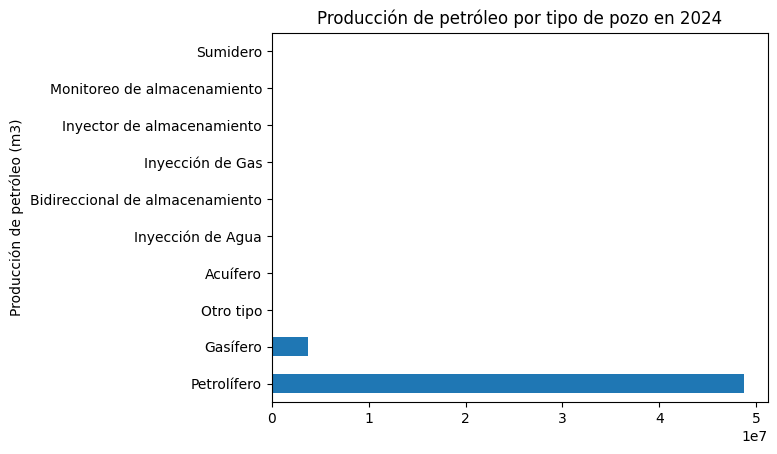

In [181]:
# format series to 2 decimal places
prod_por_tipo_pozo = produccion_2024.groupby("tipopozo")["prod_pet"].sum().round(2).sort_values(ascending=False)
prod_por_tipo_pozo.plot(kind="barh", title="Producción de petróleo por tipo de pozo en 2024", xlabel="Producción de petróleo (m3)", ylabel="Tipo de pozo")

In [ ]:
# vemos porcentaje de producción de petroleo por tipo de pozo
((prod_por_tipo_pozo / prod_por_tipo_pozo.sum()) * 100).round(2)

tipopozo
Petrolífero                        92.80
Gasífero                            7.19
Otro tipo                           0.01
Acuífero                            0.00
Inyección de Agua                   0.00
Bidireccional de almacenamiento     0.00
Inyección de Gas                    0.00
Inyector de almacenamiento          0.00
Monitoreo de almacenamiento         0.00
Sumidero                            0.00
Name: prod_pet, dtype: float64

Luego para el análisis de producción de petroleo nos vamos a quedar con los pozos cuya variable tipopozo es una de {"Petrolífero", "Gasífero", "Otro Tipo"}

In [193]:
mask_tipo_pozo = ~produccion_2024["tipopozo"].isin({"Petrolífero", "Gasífero", "Otro Tipo"})
produccion_2024_petroleo = produccion_2024[mask_tipo_pozo]

<AxesSubplot:title={'center':'Producción de petróleo en 2024'}, xlabel='Periodo', ylabel='Producción de petróleo (Mm3)'>

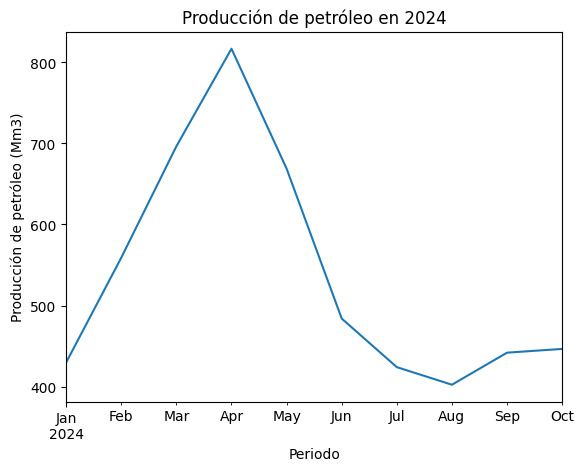

In [197]:
produccion_2024_petroleo.groupby("periodo")["prod_pet"].sum().plot(kind="line", title="Producción de petróleo en 2024", xlabel="Periodo", ylabel="Producción de petróleo (Mm3)")

In [198]:
produccion_2024_petroleo.describe()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,idusuario,profundidad
count,375660.0,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.0,375660.000000,375660.000000,6775.0,375660.000000,375660.000000
mean,2024.0,5.512759,99432.852159,0.014292,0.017276,3.627508,771.526818,0.038958,0.0,1.489457,3.297114,0.0,364.177261,1376.161496
std,0.0,2.872516,35963.739509,1.015520,3.776785,248.227867,2931.132468,6.317504,0.0,172.493871,9.346290,0.0,51.539504,982.968233
min,2024.0,1.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.000000
25%,2024.0,3.000000,72294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,690.000000
50%,2024.0,6.000000,106542.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,334.000000,1394.000000
75%,2024.0,8.000000,121887.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,369.000000,2107.000000
max,2024.0,10.000000,165766.000000,268.540000,1487.056000,43783.000000,175180.420000,1545.200000,0.0,34845.310000,31.000000,0.0,482.000000,27064.000000


<AxesSubplot:title={'center':'Boxplot de producción de petróleo en 2024'}, ylabel='Producción de petróleo (m3)'>

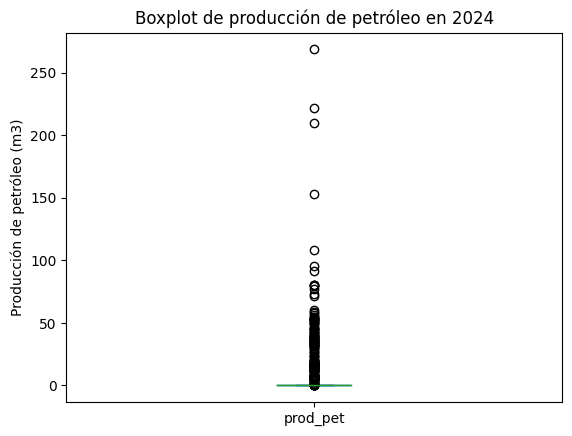

In [199]:
produccion_2024_petroleo["prod_pet"].plot(kind="box", title="Boxplot de producción de petróleo en 2024", ylabel="Producción de petróleo (m3)")

Vemos que hay muchos pozos con registros de producción en cero, veamos a qué se debe

In [200]:
produccion_2024_petroleo

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data,is_no_convencional,periodo
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31,False,2024-01-01
7,Z001,2024,1,32171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-02-22 22:45:06.486649,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-01-31,False,2024-01-01
38,Z001,2024,2,145615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Reserva para Recup. Sec./Asist.,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-03-22 08:41:34.516247,f,t,379,PETROLERA DEL COMAHUE S.A.,JG.FDRW.x-1,PROS,2034.0,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-02-29,False,2024-02-01
39,Z001,2024,2,32171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-03-22 08:41:34.516247,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-02-29,False,2024-02-01
66,Z001,2024,3,32171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Parado Transitoriamente,Inyección de Agua,Cargado automáticamente como [Sin movimientos],2024-04-15 11:12:16.006029,f,t,379,PETROLERA DEL COMAHUE S.A.,PDC.RG.x-1,PROS,1919.5,punta rosada,Z047,FLOR DE ROCA,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,INYECTOR DE AGUA,NaN,2024-03-31,False,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126856,APS,2024,6,158302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,NaN,2024-07-15 11:30:00.058954,f,t,383,CAPEX S.A.,APS.Nq.Sa-1248,LMOL,2000.0,los molles,CAO,AGUA DEL CAJON,ELSA,EL SALITRAL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2024-06-30,True,2024-06-01
1127107,APS,2024,7,158302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,NaN,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,NaN,2024-08-13 10:50:31.492184,f,t,383,CAPEX S.A.,APS.Nq.Sa-1248,LMOL,2000.0,los molles,CAO,AGUA DEL CAJON,ELSA,EL SALITRAL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2024-07-31,True,2024-07-01
1129027,APS,2024,8,158302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,NaN,Sin Sistema de Extracción,En Inyección Efectiva,Sumidero,NaN,2024-09-13 09:21:27.307934,f,t,383,CAPEX S.A.,APS.Nq.Sa-1248,LMOL,2000.0,los molles,CAO,AGUA DEL CAJON,ELSA,EL SALITRAL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTACION,DESARROLLO,TIGHT,2024-08-31,True,2024-08-01
1131106,APS,2024,9,158302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Sin Sistema de Extracción,Parado Transitoriamente,Sumidero,NaN,2024-10-15 11:39:17.624461,f,t,383,CAPEX S.A.,APS.Nq.Sa-1248,LMOL,2000.0,los molles,CAO,AGUA DEL CAJON,ELSA,EL SALITRAL,NEUQUINA,Neuquén,NO CONVENCIONAL,Sin Proyecto,EXPLOTA

In [201]:
mask_pozos_sin_produccion = produccion_2024_petroleo["prod_pet"] < 1
pozos_sin_produccion = produccion_2024_petroleo[mask_pozos_sin_produccion]

<AxesSubplot:title={'center':'Distribución porcentual de estado de los pozos sin producción de petróleo en 2024'}, ylabel='Estado'>

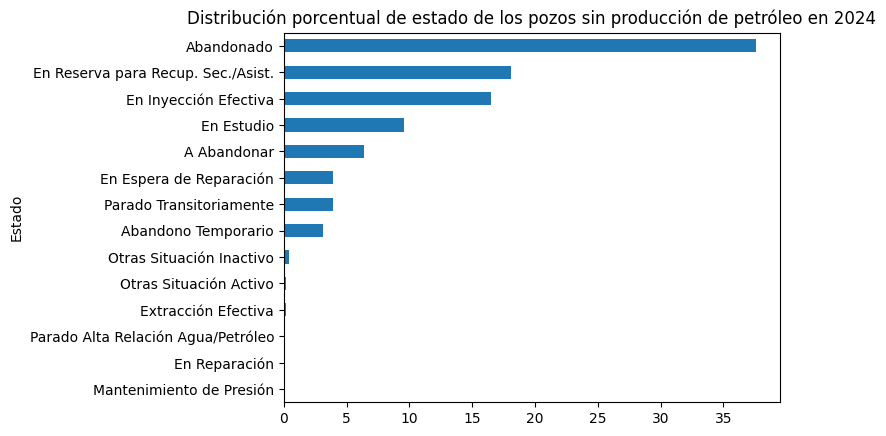

In [235]:
# analizamos el estado de los pozos sin produccion
((pozos_sin_produccion["tipoestado"].value_counts() / pozos_sin_produccion.shape[0]) * 100).sort_values(ascending=True).plot(kind="barh", title="Distribución porcentual de estado de los pozos sin producción de petróleo en 2024", rot=0, ylabel="Porcentaje", xlabel="Estado")

Vemos que estos reportes incluyen pozos que no encuentran operativos por abandono, en reserva, en reparación, etc.

Definimos eliminarlos del análisis y quedarnos solo con los pozos que producieron petroleo en el 2024

In [236]:
mask_pozos_con_produccion = produccion_2024_petroleo["prod_pet"] >= 1
produccion_2024_petroleo = produccion_2024_petroleo[mask_pozos_con_produccion]

<AxesSubplot:title={'center':'Boxplot de producción de petróleo en 2024'}, ylabel='Producción de petróleo (m3)'>

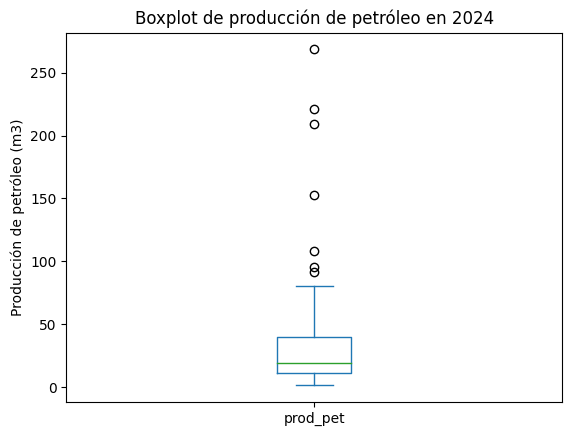

In [238]:
# volvemos a plotear el boxplot
produccion_2024_petroleo["prod_pet"].plot(kind="box", title="Boxplot de producción de petróleo en 2024", ylabel="Producción de petróleo (m3)")

<AxesSubplot:title={'center':'prod_pet'}, xlabel='mes'>

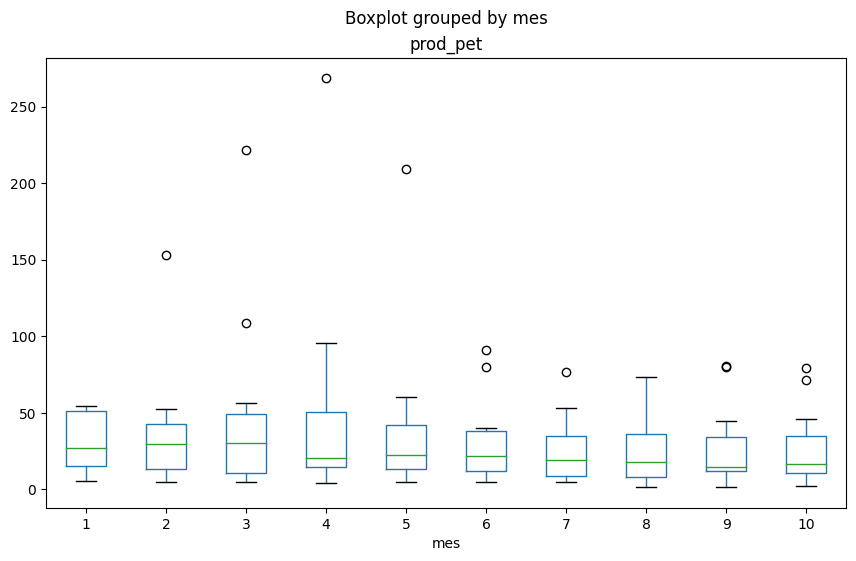

In [239]:
# boxplot por mes
produccion_2024_petroleo.boxplot(column="prod_pet", by="mes", grid=False, rot=0, figsize=(10, 6))

Ahora nos interesa ver la progresión histórica en la producción de petroleo, para ello usamos datos desde 2020 en adelante

In [289]:
# pipvot produccion por anio y mes
produccion_total_pivot = (produccion_total[produccion_total["anio"] > 2019].pivot_table(index="anio", columns="mes", values="prod_pet", aggfunc="sum", fill_value=0)/1000).round(2)

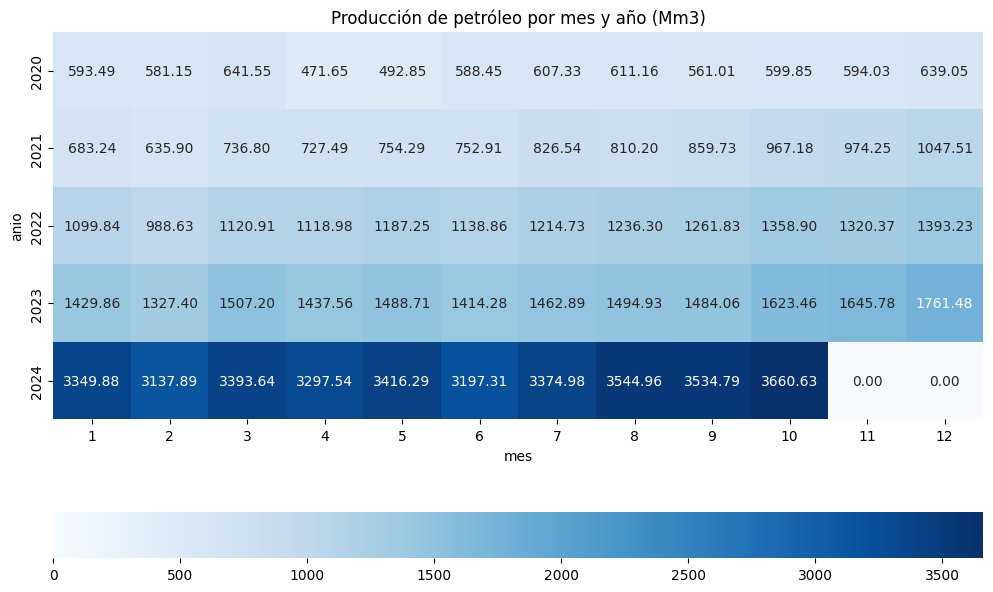

In [290]:
# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(produccion_total_pivot, cmap="Blues", annot=True, fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title("Producción de petróleo por mes y año (Mm3)")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<AxesSubplot:title={'center':'Variación interanual de producción de petróleo'}, xlabel='Año', ylabel='Variación interanual (%)'>

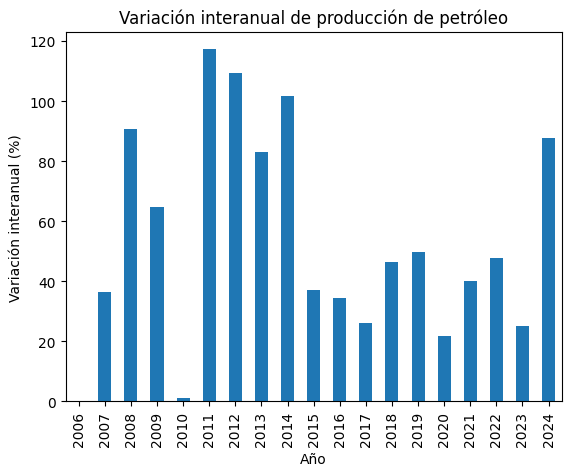

In [298]:
# variacion yoy de produccion
((produccion_total.groupby("anio")["prod_pet"].sum().round(2).pct_change())*100).plot(kind="bar", title="Variación interanual de producción de petróleo", xlabel="Año", ylabel="Variación interanual (%)")